# Q4.
##### USE MY BAYESIANNET TOOLBOX - Gibbs Sampling

In [37]:
%matplotlib inline

In [38]:
from bayesianNet import *

In [39]:
myModel = BayesianModel([('firstStep','secondStep'),('secondStep','thirdStep'),\
                             ('firstStep','sensor_s1'),('secondStep','sensor_s2'),('thirdStep','sensor_s3')])

myModel.add_cpd('firstStep',[[0.2],[0.8]])
myModel.add_cpd('secondStep',[[1, 0.2], [0, 0.8]],evidences=['firstStep'])
myModel.add_cpd('thirdStep',[[1, 0.2], [0, 0.8]],evidences=['secondStep'])
myModel.add_cpd('sensor_s1',[[1, 0.5], [0, 0.5]],evidences=['firstStep'])
myModel.add_cpd('sensor_s2',[[1, 0.5], [0, 0.5]],evidences=['secondStep'])
myModel.add_cpd('sensor_s3',[[1, 0.5], [0, 0.5]],evidences=['thirdStep'])

gibbs = GibbsSampler(myModel)

tuner = GridSearchTuner(gibbs,burnInCoefficient=np.arange(0,0.3,0.05),thinningGap=np.arange(1,6,1))

ve = VE(myModel)

##### Query 1

In [40]:
### VE query
exactFactor = ve.query(['thirdStep'])
trueVal = exactFactor.get_val((True,))

Variables: ('thirdStep',)
 Probability Distribution:
{(True,): 0.48799999999999993, (False,): 0.512}



In [ ]:
### Hyper-Parameters Tuning
bestModel = tuner.tune(['thirdStep'],exactFactor)
print('''
The optimal hyper-paramsters are:

                Burn-in Numbers: {}
                
                Thinning k: {}


'''.format(bestModel.burnInNum,bestModel.thinningGap))

In [ ]:
### Gibbs Sampling query
bestModel.query(['thirdStep'],trueValForStepShow=trueVal)

##### Query 2

In [ ]:
### VE query
exactFactor = ve.query(['thirdStep'],evidences={'sensor_s2':True})
trueVal = exactFactor.get_val((True,))

In [31]:
### Hyper-Parameters Tuning
bestModel = tuner.tune(['thirdStep'],exactFactor,evidences={'sensor_s2':True})
print('''
The optimal hyper-paramsters are:

                Burn-in Numbers: {}
                
                Thinning k: {}


'''.format(bestModel.burnInNum,bestModel.thinningGap))


The optimal hyper-paramsters are:

                Burn-in Numbers: 0.0
                
                Thinning k: 4





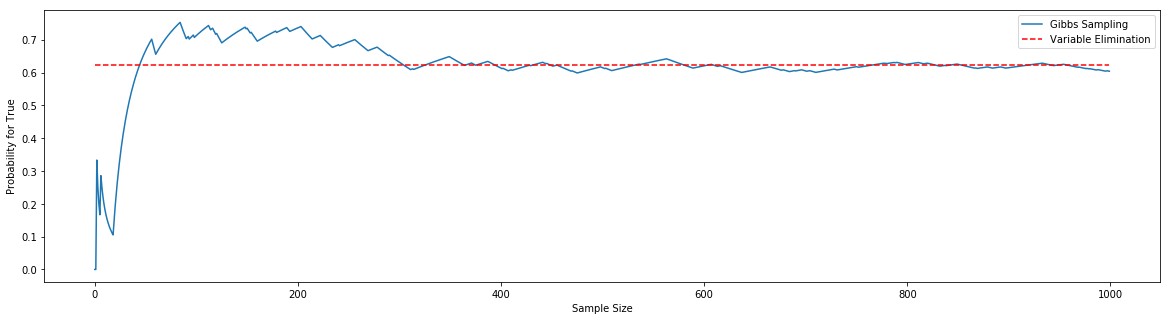

Variables: ('thirdStep',)
 Probability Distribution:
{(True,): 0.604, (False,): 0.396}



In [32]:
### Gibbs Sampling query
bestModel.query(['thirdStep'],evidences={'sensor_s2':True},trueValForStepShow=trueVal)

##### Query 3

In [33]:
### VE query
exactFactor = ve.query(['thirdStep'],evidences={'sensor_s1':True,'sensor_s2': False,'sensor_s3': True})
trueVal = exactFactor.get_val((True,))

Variables: ('thirdStep',)
 Probability Distribution:
{(True,): 0.3333333333333333, (False,): 0.6666666666666666}



In [34]:
### Hyper-Parameters Tuning
bestModel = tuner.tune(['thirdStep'],exactFactor,{'sensor_s1':True,'sensor_s2': False,'sensor_s3': True})
print('''
The optimal hyper-paramsters are:

                Burn-in Numbers: {}
                
                Thinning k: {}


'''.format(bestModel.burnInNum,bestModel.thinningGap))


The optimal hyper-paramsters are:

                Burn-in Numbers: 100.0
                
                Thinning k: 1





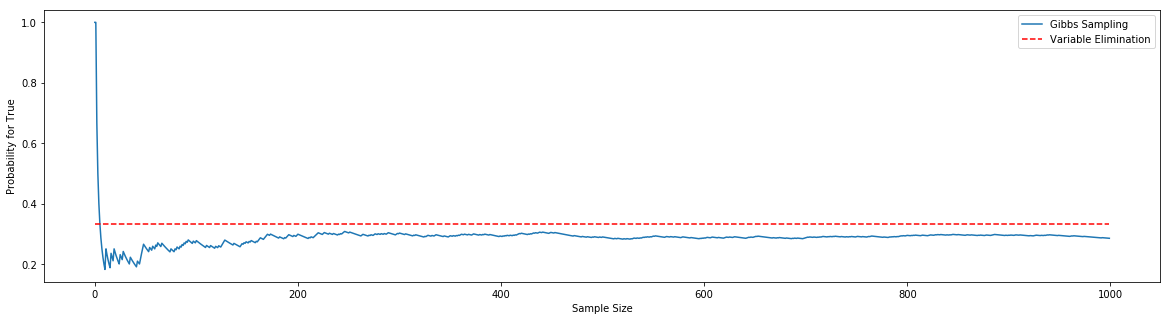

Variables: ('thirdStep',)
 Probability Distribution:
{(True,): 0.2866666666666667, (False,): 0.7133333333333334}



In [36]:
### Gibbs Sampling query
bestModel.query(['thirdStep'],evidences={'sensor_s1':True,'sensor_s2': False,'sensor_s3': True},trueValForStepShow=trueVal)